In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.models import Model
import matplotlib.pyplot as plt


In [ ]:
# load the dataset
df = pd.read_json("/content/gdrive/MyDrive/DataSet/Sarcasm_Headlines_Dataset.json", lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


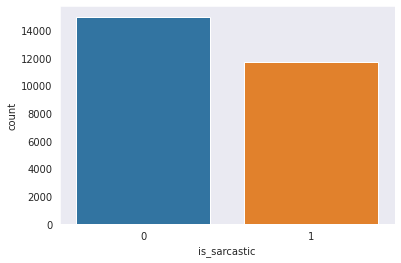

In [ ]:
# plot the class distribution
sns.set_style("dark")
sns.countplot(df.is_sarcastic)

In [ ]:
# print the number of data examples in each class
df.is_sarcastic.value_counts()


0    14985
1    11724
Name: is_sarcastic, dtype: int64

In [ ]:
# print the total number of data examples
len(df.is_sarcastic)

26709

In [ ]:
# define X and Y
X = df.iloc[:,1]
Y = df.iloc[:,2]
print(Y)

0        0
1        0
2        1
3        1
4        0
        ..
26704    0
26705    0
26706    0
26707    0
26708    0
Name: is_sarcastic, Length: 26709, dtype: int64


In [ ]:
# split the dataset into train and test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
len(X_train)

21367

In [ ]:
# data preprocessing
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)
sequences_matrix.shape

(21367, 150)

In [ ]:
sequences_matrix

array([[  0,   0,   0, ...,  11,  80, 875],
       [  0,   0,   0, ...,   4, 521,   1],
       [  0,   0,   0, ..., 235, 168, 109],
       ...,
       [  0,   0,   0, ..., 553,  16, 230],
       [  0,   0,   0, ...,  26,  78,  63],
       [  0,   0,   0, ...,  25, 123, 159]], dtype=int32)

In [ ]:
np.amax(sequences_matrix)

999

In [ ]:
#define the RNN model
def RNN():
  inputs = Input(name='inputs', shape=[max_len])
  layer = Embedding(max_words, 50, input_length=max_len)(inputs)
  layer = LSTM(64)(layer)
  layer = Dense(256, name="FC1")(layer)
  layer = Activation('relu')(layer)
  layer = Dropout(0.2)(layer)
  layer = Dense(1, name='out_layer')(layer)
  layer = Activation('sigmoid')(layer)
  model = Model(inputs=inputs, outputs=layer)
  return model

In [ ]:
#compile the model
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 150, 50)           50000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257   

In [ ]:
#fit the model
history = model.fit(sequences_matrix, Y_train, batch_size=100, epochs=5, validation_split=0.1)


Epoch 1/5
193/193 [==============================] - 25s 15ms/step - loss: 0.5650 - accuracy: 0.6875 - val_loss: 0.3925 - val_accuracy: 0.8208
Epoch 2/5
193/193 [==============================] - 2s 11ms/step - loss: 0.3932 - accuracy: 0.8285 - val_loss: 0.3941 - val_accuracy: 0.8128
Epoch 3/5
193/193 [==============================] - 2s 11ms/step - loss: 0.3585 - accuracy: 0.8390 - val_loss: 0.3824 - val_accuracy: 0.8306
Epoch 4/5
193/193 [==============================] - 2s 11ms/step - loss: 0.3488 - accuracy: 0.8413 - val_loss: 0.3839 - val_accuracy: 0.8390
Epoch 5/5
193/193 [==============================] - 2s 11ms/step - loss: 0.3271 - accuracy: 0.8573 - val_loss: 0.3889 - val_accuracy: 0.8329


In [ ]:
# plot the accuracy and loss curve

In [ ]:
#evaluate on test set
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix=sequence.pad_sequences(test_sequences, maxlen=max_len)
test_sequences_matrix.shape

(5342, 150)

In [ ]:
accr = model.evaluate(test_sequences_matrix, Y_test)
#print('Test set\n Loss: {0.3f}\n Accuracy: {:0.3f'.format(accr[0], accr[1]))